# Example of using the Zefix Advanced Tool

## Introduction

The Python package developed is designed to interact with the Swiss Official Gazette of Commerce (Zefix) API to retrieve detailed information about companies, including their acquisitions and organizational details. This package could be useful for financial analysts, market researchers, business consultants, and anyone interested in Swiss company data. It's entirely built to work with the Zefix API https://www.zefix.ch/en/search/entity/welcome.

The following documentation provides a comprehensive guide on how to install and use this package. It also explains what the functions do and their components.

Each function differs from the standard GET requests that you would normally use. See the description of each function to see its enhanced capabilities.

# Function #1 - search_companies_named

The search_companies_named function is useful for identifying companies that match a specific name or partial name, providing comprehensive information about each matching company.

This function takes in a company name or part of it (string) and returns a dataframe with information about all companies named like that. 

**Enhancement**

- automatically translates the status and purpose fields from german, french and italian to english. 
- searches multiple companies at once that share a certain name (e.g. 'UBS')
- directly provides understandable information about each company's legal form. Normally, you would only get a code that you need to then look up from another endpoint of the API. 
- automatically counts the number of publications on that firm, the number of firms directly taken over by that company, the number of branch offices and the number of old names of the company.
- allows you to save results in a json file
- returns the companies as a pandas dataframe or as a list of dictionaries

**Parameters:**

- *name (str):* name of the company (or part of it) to search for. Not caps sensitive.

- *simple (bool):* False by default. If True, returns a simplified version of the dictionary with only the name, ehraid, and legalSeat of the company.

- *save (bool):* False by default. If True, saves the data to a JSON file called "name_companies.json". If simple is also True at the same time, saves the data to a JSON file called "name_companies_simple.json" instead.

- *df (bool):* True by default. If True, returns the data as a pandas DataFrame. If False, returns the data as a list of dictionaries.

**Returns:**
    
- if df=False, it returns: 
    
list_of_companies (list): a list of dictionaries, each containing information about a company found in the search

- if df=True (default), it returns:

list_of_companies (DataFrame): a pandas DataFrame containing information about all companies found in the search

The dataframe in the list will contain the following information about the company:

- 'name':                 name of the company
- 'ehraid':               unique identifier of the company
- 'legalSeat':            location of the company's legal seat
- 'status':               status of the company (active or not)
- 'deleteDate':           date when the company was deleted (if applicable)
- 'wasTakenOverBy':       name of the company that took over this one (if applicable)
- 'purpose':              purpose of the company
- 'legalForm':            legal form of the company
- 'cancelled':            boolean value indicating if the company is cancelled or not
- 'n_of_shabPub':         counts the number of publications in the Swiss Official Gazette of Commerce
- 'n_of_branchOffices':   counts the number of branch offices of the company
- 'n_of_oldNames':        counts the number of old names of the company
- 'n_of_hasTakenOver':    counts the number of companies taken over by this one
- 'town':                 name of the town where the company is located
- 'swissZipCode':         Swiss zip code of the company

if simple=True, the dataframe/list of dictionaries will only contain the following:

- 'name':                name of the company
- 'ehraid':              unique identifier of the company
- 'legalSeat':           location of the company's legal seat

**Example**

options activated: simple, save and df.

In [7]:
# Search Companies Named "Coop"
coop_simple_save_df = search_companies_named("Coop", simple=True, save=True, df=True)

# Display the DataFrame result
coop_simple_save_df


Data saved to Coop_companies_simple.json


,name,ehraid,legalSeat,cantonalExcerptWeb
0,Baugenossenschaft Bel Air,38828,Evilard,https://be.chregister.ch/cr-portal/auszug/ausz...
1,Branchen Versicherung Genossenschaft,323190,Zürich,https://zh.chregister.ch/cr-portal/auszug/ausz...
2,Coopar Società Cooperativa in liquidazione,1215435,Lugano,https://ti.chregister.ch/cr-portal/auszug/ausz...
3,"COOPELIA, coopérative sociale pour l'encourage...",364304,Gland,https://prestations.vd.ch/pub/101266/extract?l...
4,CoOpera Beteiligungen AG,233739,Bern,https://be.chregister.ch/cr-portal/auszug/ausz...
5,CoOpera Immobilien AG,418805,Bern,https://be.chregister.ch/cr-portal/auszug/ausz...
6,Coopera International Sàrl,1613929,Lancy,http://app2.ge.ch/ecohrcinternet/extract?lang=...
7,CoOpera Leasing AG,130215,Baar,https://zg.chregister.ch/cr-portal/auszug/ausz...
8,CoOpera Sammelstiftung PUK,280185,Bern,https://be.chregister.ch/cr-portal/auszug/ausz...
9,coOPERATION-zanotti GmbH,1332539,Beromünster,https://lu.chregister.ch/cr-portal/auszug/ausz...


# FUNCTION #2 - get_acquisitions_data

The get_acquisitions_data function is essential for tracking the acquisition history of a specific company, including both direct and indirect acquisitions. This is especially useful, since it automates the lengthy task of looking up each individual company that was acquired to see if they also acquired other companies (and so on). For example, with a big firm of the likes of UBS, without this function you would have to look up about *one hundred* different companies to understand how far the tree of minor and major acquisitions extends.

For example, if firm A has taken over firm B, and firm B has taken over firm C, the function will return information about firm A, firm B, and firm C. Starting from A, the function will count the number of "hops" to reach the last firm in the chain. The function has also an option to save the data to a JSON file, and you can ask to return the information either as a pandas dataframe or as a list of dictionaries. The latter can be used to visualize the tree of companies using the plot_acquisitions function, explained later. 
    
**Parameters:**

- *ehraid (str):* ehraid of the firm to start from
- *hops (int):* DO NOT CHANGE THIS VALUE, it is used as a counter for the number of hops from the initial ehraid
- *save (bool):* if True, saves the data to a JSON file called 'takeovers.json'
- *df (bool):* if True, returns the data as a pandas DataFrame

**Returns:**

- if df=False (default): 

acquisitions (list): a list of dictionaries, each containing information about a firm and the firms it has taken over

- if df=True:

acquisitions (DataFrame): a pandas DataFrame containing information about all firms and the firms they have taken over

**Example**

All acquisitions of UBS AG (ehraid is 415520). Save option is activated, df option is not.

In [10]:
# Example: Get Acquisitions Data for Company with ehraid 415520, which is UBS AG ERHAID
ubs_ag_acquisitions = get_acquisitions_data(415520, hops=0, save=True, df=False)

# Display the result
ubs_ag_acquisitions

Data saved to takeovers.json


,name,ehraid,legalSeat,legalFormId,status,cantonalExcerptWeb,deleteDate,hops
0,UBS AG,415520,Basel,3,Active,https://bs.chregister.ch/cr-portal/auszug/ausz...,None,0
1,Credit Suisse AG,388851,Zürich,3,Deleted,https://zh.chregister.ch/cr-portal/auszug/zefi...,2024-06-04,1
2,ABZ - Finanz- und Beteiligungsgesellschaft AG,619,Zug,3,Deleted,https://zg.chregister.ch/cr-portal/auszug/zefi...,2009-07-06,2
3,Faminta AG,55686,Zürich,3,Deleted,https://zh.chregister.ch/cr-portal/auszug/zefi...,2008-04-04,2
4,Hochhaus zur Palme AG,81396,Zürich,3,Deleted,https://zh.chregister.ch/cr-portal/auszug/zefi...,2006-07-06,2
...,...,...,...,...,...,...,...,...
99,Stadion Zürich AG,77348,Zürich,3,Deleted,https://zh.chregister.ch/cr-portal/auszug/zefi...,2010-07-12,2
100,Credit Suisse (International) Holding AG,390377,Zug,3,Deleted,https://zg.chregister.ch/cr-portal/auszug/zefi...,2010-07-06,2
101,Credit Suisse First Boston Management AG,399185,Zürich,3,Deleted,https://zh.chregister.ch/cr-portal/auszug/zefi...,2006-07-06,3
102,Credit Suisse First Boston Services AG,399275,Zürich,3,Deleted,https://zh.chregister.ch/cr-portal/auszug/zefi...,2006-07-06,3


# FUNCTION #3 - plot_acquisitions

The plot_acquisitions function offers a visual representation of a company's acquisition chain, illustrating the number of acquisition "hops" from the initial company. 

Takes in the output of the function **acquisitions_data** with the option df=False: a list of dictionaries with information about firms and their acquisitions. Plots the acquisitions on a graph.

From left to right, the x axis represents the number of acquisition "hops" from the initial firm, which has hops=0. 
    
**Parameters:**

- *acquisitions (list of dictionaries):* list of dictionaries with information about firms and their acquisitions. You can get data structured this way running the function acquisitions_data from the same package as this one.
    
**Returns:** 

- A plot displaying the acquisition chains, with the x-axis representing the number of hops.

**Example**

We are using the output of the get_acquisitions_data example from before, concerning UBS AG.

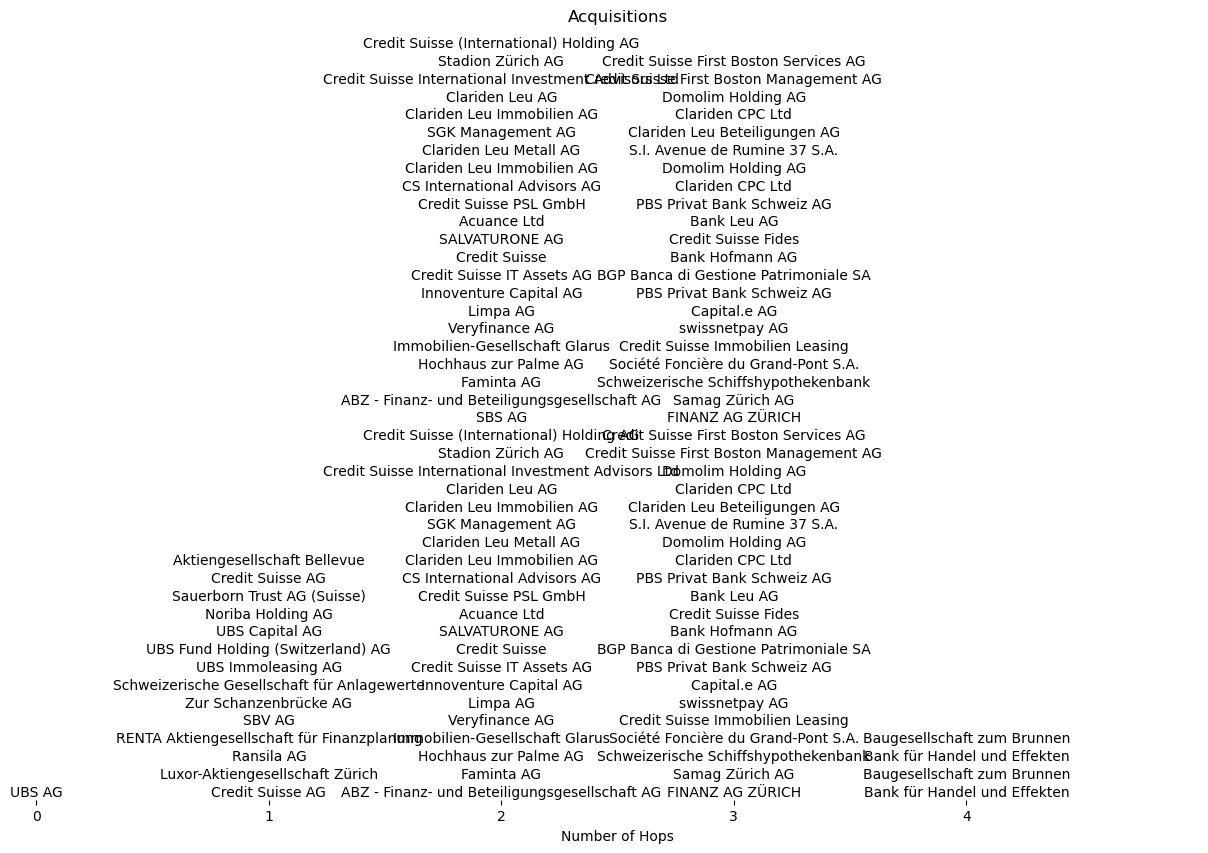

In [13]:
# Example: Plot Acquisitions Data
plot_acquisitions(ubs_ag_acquisitions_no_save_no_dataframe)

### ⚠️ Warning
You need to input a list of dictionaries that you obtained from the function get_acquisition_data with the option df = False. 
Otherwise, you will get an error code like in the following example.

In [14]:
plot_acquisitions(ubs_ag_acquisitions)

'Please provide a list of dictionaries with information about firms and their acquisitions as input. You can get this data by running the function acquisitions_data in this same package. Use the default option df=False'

# FUNTION #4 - check_acquirers

The check_acquirers function provides detailed information about companies that have taken over a specific firm, identified by its EHRAID (a unique identifier assigned to companies in the Swiss Official Gazette of Commerce).

It finds all acquirers of a certain company in one go, automatically implementing translations of the status and purpose of that company from french, german or italian to english. It also automatically retrieves an understandable company's legal form from another zefix endpoint, instead of just giving its ID as output. The output can be a pandas dataframe or a list of dictionaries.


**Parameters:**

- *ehraid (str):* The unique identifier (EHRAID) of the company whose acquirers need to be checked. This must be a string representing the EHRAID of the target company.
- *df (bool):* Default is True. If True, the function returns the data as a pandas DataFrame. If False, the data is returned as a list of dictionaries.

**Returns:**

- If df is True: 

Returns a pandas DataFrame containing detailed information about the companies that have taken over the specified company.

- If df is False: 

Returns a list of dictionaries with detailed information about the acquirers.

The resulting DataFrame or list includes the following information about each acquirer:

- 'name:' The name of the acquirer company.
- 'ehraid:'                   The unique identifier of the acquirer company.
- 'legalSeat:'                The location of the acquirer's legal seat.
- 'legalFormId:'              The legal form of the acquirer company.
- 'status:'                   The current status of the acquirer company (translated into English if necessary).
- 'cantonalExcerptWeb:'       A web link to the cantonal excerpt for the acquirer company.
- 'deleteDate:'               The date when the acquirer company was deleted, if applicable.
- 'purpose:'                  The purpose of the acquirer company, translated into English.
- 'capitalNominal:'           The nominal capital of the acquirer company.

**Example**

Example with the option dataframe active for the company Virex SA with (its ehraid is 247693)

In [17]:
acquirers_df = check_acquirers("247693", df=True)

acquirers_df

,name,ehraid,legalSeat,legalFormId,status,cantonalExcerptWeb,deleteDate,purpose,capitalNominal
0,ROLEX SA,122015,Genève,Corporation,Active,http://app2.ge.ch/ecohrcinternet/extract?lang=...,None,"The manufacture and trade of watches, time mea...",None
